TASK 3: TO EXPLORE UNSUPERVISED MACHINE LEARNING 


In [54]:
#import all the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import scale

IMPORTING THE DATASET AND CREATING A DATAFRAME 

In [55]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


CHECKING FOR THE NULL VALUES 

In [56]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


SEPARATING THE FEATURES AND TARGET AND DROPPING THE DUPLICATE ROWS OR COLUMNS

In [58]:
X=iris.drop('Species',axis='columns')
y=iris['Species']
X.drop_duplicates(inplace=True)
X.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


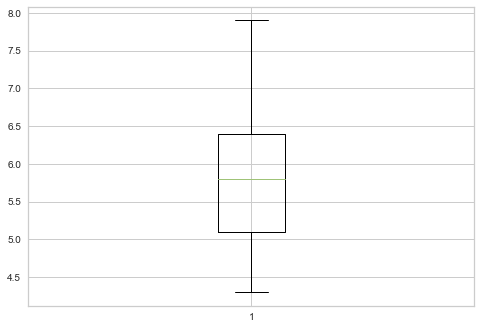

In [59]:

plt.boxplot([iris['SepalLengthCm']])


plt.show()

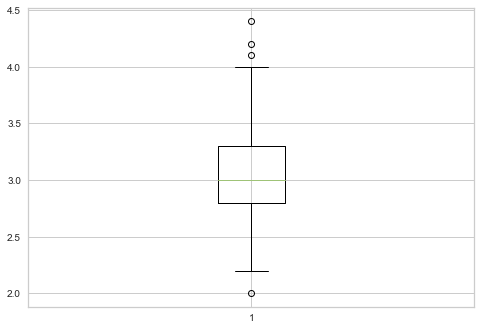

In [60]:
plt.boxplot([iris['SepalWidthCm']])
plt.show()

VISUALIZATION THE COUNT PLOT FOR SPECIES

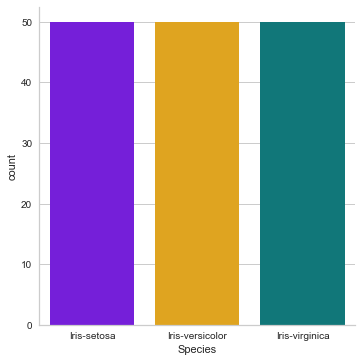

In [61]:
sns.catplot(x='Species',kind='count',data=iris,palette='prism_r')

HISTOGRAM PLOT FOR VARIOUS FEATURES OF THE DATASET

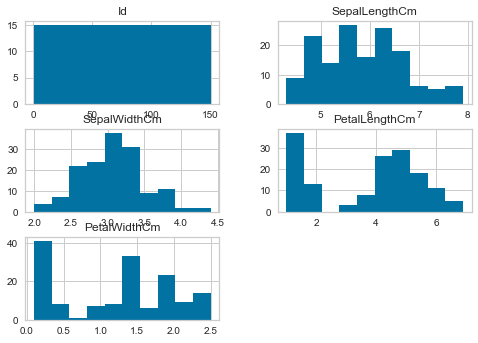

In [62]:
iris.hist()
plt.show()

VISUALIZATION OF THE DENSITY OF EACH FEATURE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009F8A0583C8>,
      dtype=object)

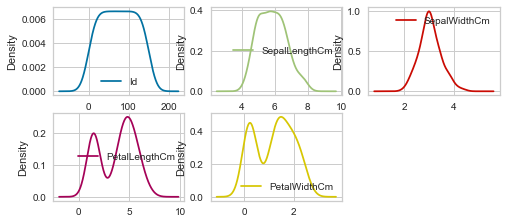

In [63]:
iris.plot(kind='density',sharex=False,subplots=True,layout=(3,3))

FINDING THE OPTIMUM NUMBER OF CLUSTERS USING K-MEANS CLUSTERING

In [64]:
sum_squared_distance=[]
k=range(1,11)
for n_clusters in k:
    km=KMeans(n_clusters=n_clusters,init="k-means++",n_init=10,max_iter=300,random_state=1)
    km.fit(X)
    sum_squared_distance.append(km.inertia_)

FINDING THE VALUE OF K BY PLOTTING THE ELBOW CURVE 

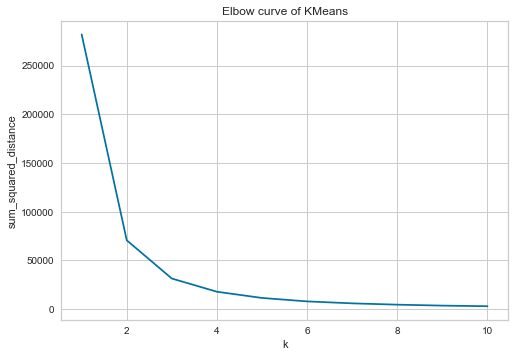

In [65]:
plt.plot(k,sum_squared_distance)
plt.xlabel('k')
plt.ylabel('sum_squared_distance')
plt.title('Elbow curve of KMeans')
plt.show()

DIVIDING THE DATASET INTO TRAINING AND TESTING DATA USING train_test_split

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [67]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [68]:
k=3
kmeans=KMeans(n_clusters=k,random_state=0).fit(X)

In [69]:
centroid = kmeans.cluster_centers_
centroid.reshape(-1,1)
labels = kmeans.labels_

In [70]:
prediction=kmeans.predict(X_test)
prediction

array([1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1])

VISUALIZATION USING DATASET FOR THE OPTIMUM NUMBER OF CLUSTERS AND PLOTTING THE CENTROIDS 

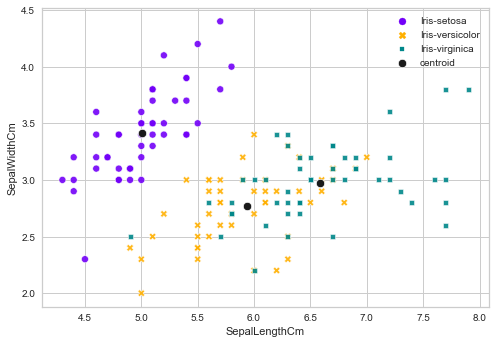

In [71]:
ax=sns.scatterplot(data=iris,x='SepalLengthCm',y='SepalWidthCm',alpha=0.9,palette='prism_r',hue='Species',style='Species')
ax=sns.scatterplot(x=centroid[:,1],y=centroid[:,2],label='centroid',s=70,color='0.1',markers='o',legend=False,ax=ax)

plt.legend()


CALCULATING THE SILHOUETTE SCORE 


Another method for finding the optimum number of clusters and to know the separating distance between the resulting distance .The Silhouette plot defines how close the point in one cluster is with the other point in another cluster and will provide a way to find the optimum number of clusters.Silhouette analysis gives more accuracy than Elbow curve.

In [72]:
print(silhouette_score(X,labels))

0.5821934246576435


INSTALLING THE YELLOWBRICK PACKAGE FOR VISUALIZATION OF THE DATA SET 

In [73]:
!pip install yellowbrick
!pip install -U yellowbrick


Requirement already up-to-date: yellowbrick in c:\anaconda\lib\site-packages (1.1)


In [74]:
#importing the libraries
from yellowbrick.cluster import KElbowVisualizer

In [75]:
X,y=make_blobs(n_samples=150,n_features=5,centers=3,random_state=0)
model = KMeans()


PLOTTING THE ELBOW CURVE

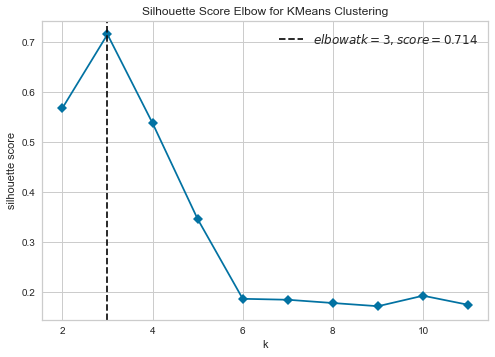

In [76]:
visualizer = KElbowVisualizer(model,metric='silhouette',k=(2,12),timings=False)
visualizer.fit(X)
visualizer.show()

PLOTTING THE SILHOUETTE PLOT FOR THE DATASET BY CALCULATING THE SILHOUETTE CO-EFFICIENT AND SILHOUETTE SCORE FOR K=3

The Silhouette score is: 0.7143889526665694 for n_clusters: 3


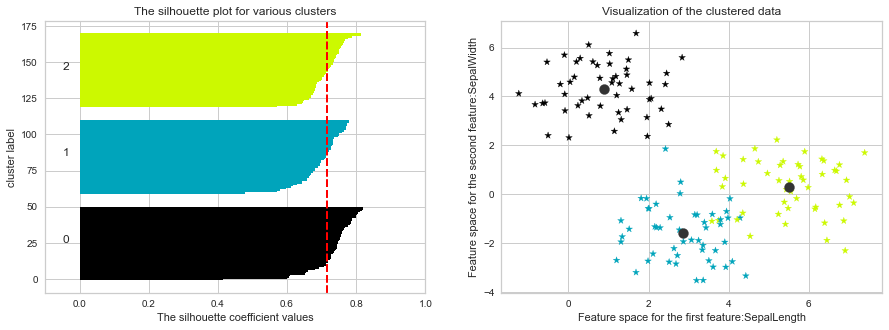

In [78]:


range_n_clusters=[3]

for n_cluster in range_n_clusters:
    fig , ax = plt.subplots(1,2,figsize=(15,5))
    clusterer=KMeans(n_clusters=k,random_state=10)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_vals=silhouette_samples(X,cluster_labels)

y_lower=y_upper=0
for i in range(n_cluster):
    cluster_silhouette_vals=silhouette_vals[labels==i]
    cluster_silhouette_vals.sort()
    size_cluster_i=cluster_silhouette_vals.shape[0]
    y_upper = y_lower+ size_cluster_i
    
    color=cm.nipy_spectral(float(i)/n_cluster)
    
    ax[0].barh(range(y_lower,y_upper),cluster_silhouette_vals,height=2,facecolor=color)
    ax[0].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
    y_lower=y_upper+10
    
    #silhouette score
    avg_score=silhouette_score(X,cluster_labels)
    #plotting the first plot
    ax[0].axvline(avg_score,linestyle='--',linewidth=2,color='red')
    ax[0].set_yticks=([0,len(X)+(n_cluster+1)*10])
    ax[0].set_xlim([-0.1,1])
    ax[0].set_xlabel('The silhouette coefficient values')
    ax[0].set_ylabel('cluster label')
    ax[0].set_title('The silhouette plot for various clusters')
#plotting the second plot 
centers=clusterer.cluster_centers_
color=cm.nipy_spectral(cluster_labels.astype(float)/n_cluster)
ax[1].scatter(X[:,0],X[:,1],marker='*',c=color)
ax[1].scatter(centers[:,0],centers[:,1],marker='o',c='0.2',s=100)
ax[1].set_xlabel('Feature space for the first feature:SepalLength')
ax[1].set_ylabel('Feature space for the second feature:SepalWidth')
ax[1].set_title('Visualization of the clustered data')
print("The Silhouette score is:",avg_score,"for n_clusters:",n_cluster)

    

As we can see the Silhouette_score is more compared to as calculated earlier.